# Logistic regression from scratch

In [1]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [2]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

# Logistic regression using scikit-learn : Digits dataset

In [26]:
# Loading the Digits Dataset
from sklearn.datasets import load_digits
digits = load_digits()

In [27]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


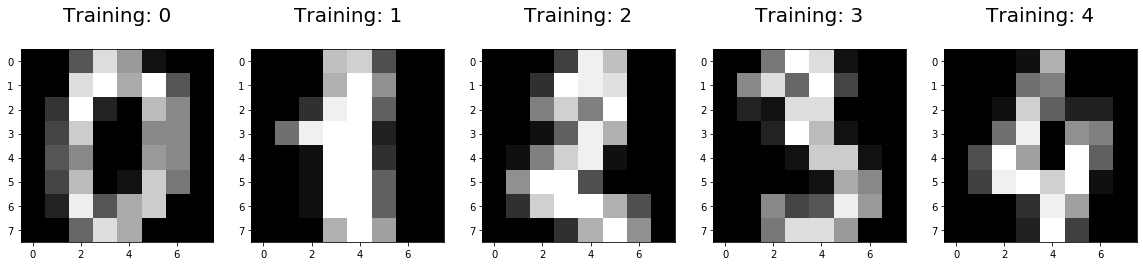

In [28]:
# Showing the Images and the Labels (Digits Dataset)
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [29]:
# Splitting Data into Training and Test Sets (Digits Dataset)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [30]:
# Model creation and training
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [31]:
logisticRegr.fit(x_train, y_train)

/Users/noor-4785/Documents/training_and_developement/vit_fdp/temp_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/noor-4785/Documents/training_and_developement/vit_fdp/temp_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
#  Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [33]:
# Predict for Multiple Observations (images) at Once
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [34]:
# Make predictions on entire test data
predictions = logisticRegr.predict(x_test)

In [35]:
# Measuring Model Performance (Digits Dataset)
score = logisticRegr.score(x_test, y_test)
print(score)

0.9533333333333334


In [36]:
# Confusion Matrix (Digits Dataset)
import matplotlib.pyplot as plt
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


# Logistic regression using scikit-learn : diabetes dataset

## Import necessary libraries

In [52]:
import numpy
import pandas as pd
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

%matplotlib inline

## Load and explore data

In [102]:
# Data Description : https://www.kaggle.com/uciml/pima-indians-diabetes-database
dataset=pd.read_csv("data/pima-indians-diabetes-data.csv")

In [103]:
dataset.head()
# dataset.head(10)

,num_pregnant,plasma_glucose,blood_pressure,skin_thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [104]:
dataset.describe(include='all')

,num_pregnant,plasma_glucose,blood_pressure,skin_thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [105]:
dataset.dtypes.value_counts()

int64      7
float64    2
dtype: int64

In [106]:
dataset['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

## Missing value Treatment

The following columns have an invalid zero minimum value:

* Plasma glucose concentration
* Diastolic blood pressure
* Triceps skinfold thickness
* 2-Hour serum insulin
* Body mass index

In [107]:
# Lets cross check
dataset.head(20)

,num_pregnant,plasma_glucose,blood_pressure,skin_thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [116]:
dataset = pd.read_csv("data/pima-indians-diabetes-data.csv", header=None, skiprows=1)
print((dataset[[1,2,3,4,5]] == 0.0).sum())

1      5
2     35
3    227
4    374
5     11
dtype: int64


In [117]:
dataset.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [118]:
# Mark zero values as missing or NaN
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, np.NaN)
# Count the number of NaN values in each column
print(dataset.isnull().sum())

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64


In [120]:
dataset.head()

,0,1,2,3,4,5,6,7,8
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [121]:
# Impute the missing values

In [124]:
# Fill missing values with mean column values
dataset.fillna(dataset.mean(), inplace=True)
# Count the number of NaN values in each column
print(dataset.isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


In [ ]:
df.drop(df.columns[i], axis=1)

In [126]:
# Split dataset into inputs and outputs
values = dataset.values
X = values[:,0:8]
y = values[:,8]

You have created the Logistic Regression model with some random hyperparameter values. The hyperparameters that you used are:

penalty : Used to specify the norm used in the penalization (regularization).
dual : Dual or primal formulation. The dual formulation is only implemented for l2 penalty with liblinear solver. Prefer dual=False when n_samples > n_features.
max_iter : Maximum number of iterations taken to converge.

In [127]:
lr = LogisticRegression(penalty='l1',dual=False,max_iter=110)

In [128]:
lr.fit(X,y)

/Users/noor-4785/Documents/training_and_developement/vit_fdp/temp_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=110,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [130]:
lr.score(X,y)

0.7747395833333334

In [131]:
# You will need the following dependencies for applying Cross-validation and evaluating the cross-validated score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [132]:
# Build the k-fold cross-validator

kfold = KFold(n_splits=3, random_state=7)

In [133]:
result = cross_val_score(lr, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.765625


/Users/noor-4785/Documents/training_and_developement/vit_fdp/temp_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/noor-4785/Documents/training_and_developement/vit_fdp/temp_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/noor-4785/Documents/training_and_developement/vit_fdp/temp_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [134]:
from sklearn.model_selection import GridSearchCV

In [135]:
dual=[True,False]
max_iter=[100,110,120,130,140]
param_grid = dict(dual=dual,max_iter=max_iter)

In [136]:
import time

lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X, y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.752604 using {'dual': False, 'max_iter': 100}
Execution time: 5.540132999420166 ms


/Users/noor-4785/Documents/training_and_developement/vit_fdp/temp_env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/noor-4785/Documents/training_and_developement/vit_fdp/temp_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [137]:
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X, y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.763021 using {'C': 2.0, 'dual': False, 'max_iter': 100}
Execution time: 0.23415184020996094 ms


/Users/noor-4785/Documents/training_and_developement/vit_fdp/temp_env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/noor-4785/Documents/training_and_developement/vit_fdp/temp_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [138]:
from sklearn.model_selection import RandomizedSearchCV

random = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
random_result = random.fit(X, y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.756510 using {'max_iter': 100, 'dual': False, 'C': 1.5}
Execution time: 0.1636359691619873 ms


/Users/noor-4785/Documents/training_and_developement/vit_fdp/temp_env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/noor-4785/Documents/training_and_developement/vit_fdp/temp_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Prepare training and testing data

In [139]:
#create a dataframe with all training data except the target column
X = dataset.drop(columns=['diabetes'])

#check that the target variable has been removed
X.head()

KeyError: "['diabetes'] not found in axis"

In [42]:
#one-hot encode target column
Y = pd.get_dummies(dataset.diabetes, drop_first=True)

# Y

In [43]:
(trainX, testX, trainY, testY) = train_test_split(X, Y, test_size=0.25, random_state=42)

In [44]:
print("Number of data in training set ",len(trainX), len(trainY))
print("Number of data in tesing set ",len(testX), len(testY))

Number of data in training set  576 576
Number of data in tesing set  192 192


## Model building

In [45]:
# There are three steps to model something with sklearn
# 1. Set up the model
model = LogisticRegression()
# 2. Use fit
model.fit(trainX, trainY)
# 3. Check the score
model.score(testX, testY)

/Users/noor-4785/Documents/training_and_developement/vit_fdp/temp_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/noor-4785/Documents/training_and_developement/vit_fdp/temp_env/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7447916666666666

In [46]:
predY = model.predict(testX)

In [47]:
testX

,num_pregnant,plasma_glucose,blood_pressure,skin_thickness,insulin,bmi,pedigree,age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
204,6,103,72,32,190,37.7,0.324,55
97,1,71,48,18,76,20.4,0.323,22
336,0,117,0,0,0,33.8,0.932,44
568,4,154,72,29,126,31.3,0.338,37
148,5,147,78,0,0,33.7,0.218,65


## Save and Load the model / Prediction

In [25]:
import pickle

In [31]:
# save the model to disk
filename = 'logr_model'
pickle.dump(model, open(filename, 'wb'))

In [32]:
Xnew = [[6, 98, 58, 33, 190, 34.0, 0.430, 43]]
ynew = model.predict(Xnew)
ynew

array([0], dtype=uint8)

In [33]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [34]:
ynew = loaded_model.predict(Xnew)
ynew

array([0], dtype=uint8)